In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

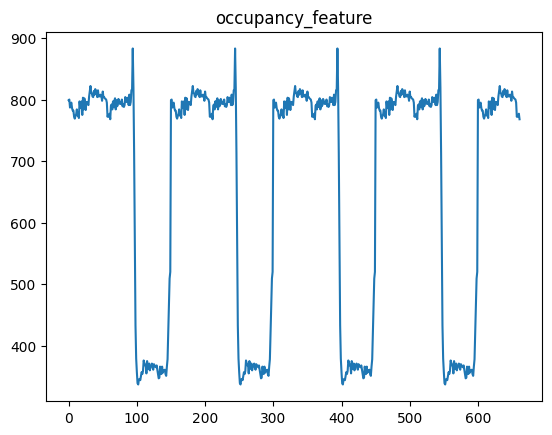

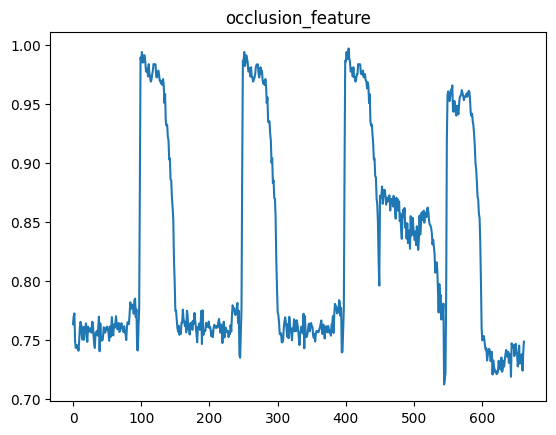

In [15]:
# read data from csv file
filepath = './data/soldier_VS128_per/'
filename = 'P02_V1node_feature.csv'
data = pd.read_csv(filepath + filename)
# get column name
column_name = data.columns.values
column_name = [ 'occupancy_feature', 'in_FoV_feature',
       'occlusion_feature', 'coordinate_x', 'coordinate_y',
       'coordinate_z', 'distance', 'node_index']
# data_numpy[:,0]
# get data when node_index == 134
data_numpy = data[data['node_index'] == 134].values
# plot occupancy_feature
plt.figure()
plt.plot(data_numpy[:,1])
plt.title('occupancy_feature')
plt.show()

# plot occlusion_feature
plt.figure()
plt.plot(data_numpy[:,3])
plt.title('occlusion_feature')
plt.show()



